In [ ]:
from fbprophet import Prophet
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import xlrd

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [ ]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Importing the dataset

In [ ]:
df = pd.read_excel('superstore.xlsx')


In [ ]:
import plotly.express as px

In [ ]:
!pip install plotly-express


In [ ]:
import plotly.express as px

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [ ]:
df['abbrev'] = df['State'].map(abbrev)

In [ ]:
df_new = df.groupby(by=["abbrev"]).mean()

In [ ]:
df_new.reset_index(inplace=True)

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,abbrev
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,KY
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,KY
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,FL
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,FL
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,CA
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,CA
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,CA


In [ ]:

fig = px.choropleth(df_new,
                    locations='abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Sales',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.update_layout(
      title_text = 'Mean Sales per State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

In [ ]:
df['Order Date']= pd.to_datetime(df['Order Date'])

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'abbrev'],
      dtype='object')

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
print(furniture.shape, office.shape)

(2121, 22) (6026, 22)


In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


In [ ]:
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)


In [ ]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')


In [ ]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()



In [ ]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [ ]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')


# Computing monthly average sales

In [ ]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()


In [ ]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})




In [ ]:
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)

In [ ]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']


In [ ]:
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))


Office supplies first time produced higher sales than furniture is 2014-07-01.


In [ ]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})


# Facebook's Prophet Library  

In [ ]:
train_furniture = furniture[:36]
test_furniture = furniture[36:]

In [ ]:
furniture_model_train = Prophet()
furniture_model_train.fit(train_furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
train_furniture = train_furniture.set_index('ds')

In [ ]:
furniture_forecast_train = furniture_model_train.make_future_dataframe(periods=12, freq = 'MS')
furniture_forecast_train = furniture_model_train.predict(furniture_forecast_train)

In [ ]:
predict_furniture = furniture_forecast_train.tail(12)['yhat']

In [ ]:
from sklearn.metrics import mean_squared_error

# Root mean squre error for furniture forecasting

In [ ]:
np.sqrt(mean_squared_error(predict_furniture,test_furniture['y']))

194.91669701987678

In [ ]:
test_furniture['y'].mean()

788.9924321352877

In [ ]:
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})


In [ ]:
train_office = office[:36]
test_office = office[36:]

In [ ]:
office_model_train = Prophet()
office_model_train.fit(train_office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
train_office = train_office.set_index('ds')

In [ ]:
office_forecast_train = office_model_train.make_future_dataframe(periods=12, freq = 'MS')
office_forecast_train = office_model_train.predict(office_forecast_train)

In [ ]:
predict_office = office_forecast_train.tail(12)['yhat']

# Root Mean Square error for office supply

In [ ]:
np.sqrt(mean_squared_error(predict_office,test_office['y']))

398.6796487001986

In [ ]:
test_office

,ds,y
36,2017-01-01,967.013136
37,2017-02-01,389.882737
38,2017-03-01,538.899481
39,2017-04-01,558.229296
40,2017-05-01,508.776444
41,2017-06-01,650.463038
42,2017-07-01,393.902615
43,2017-08-01,1156.148154
44,2017-09-01,1139.137250
45,2017-10-01,886.045846


In [ ]:
test_office['y'].mean()

780.1716465938612

In [ ]:
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Furniture forecasting upto 2024

In [ ]:
furniture_forecast = furniture_model.make_future_dataframe(periods=72, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

<Figure size 144x144 with 0 Axes>

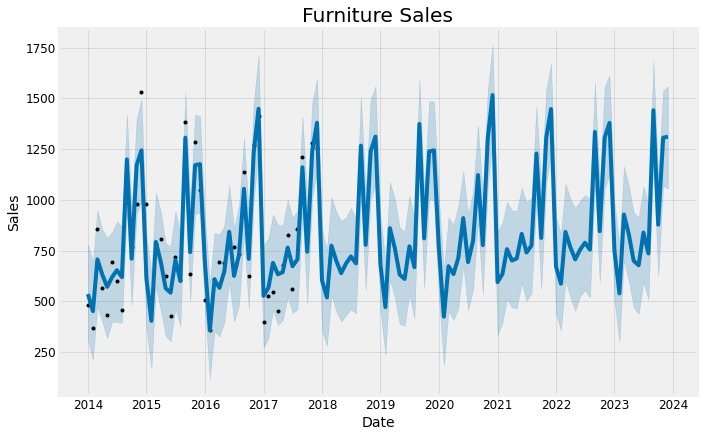

In [ ]:
plt.figure(figsize=(2, 2))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

# Office Supply Forecasting upto 2024


In [ ]:

office_forecast = office_model.make_future_dataframe(periods=72, freq='MS')
office_forecast = office_model.predict(office_forecast)

<Figure size 1296x432 with 0 Axes>

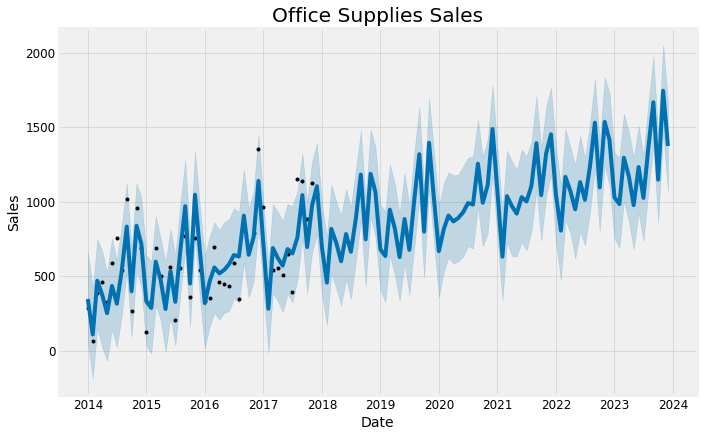

In [ ]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales')
plt.show()

In [ ]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

In [ ]:
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

In [ ]:
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

In [ ]:
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
#forecast.to_excel("Forecast.xlsx")


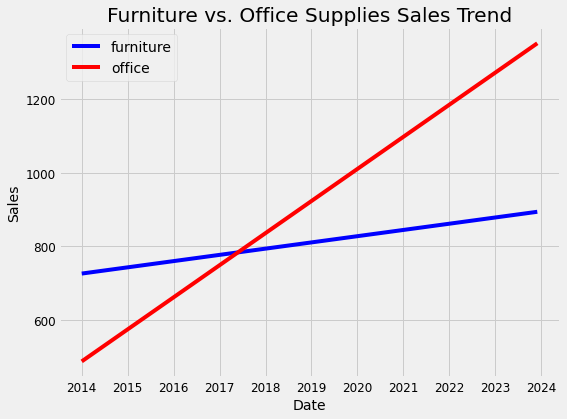

In [ ]:
#Trend and Forecast Visualization
plt.figure(figsize=(8, 6))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-', label = 'furniture')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-',label='office')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend')
plt.show()

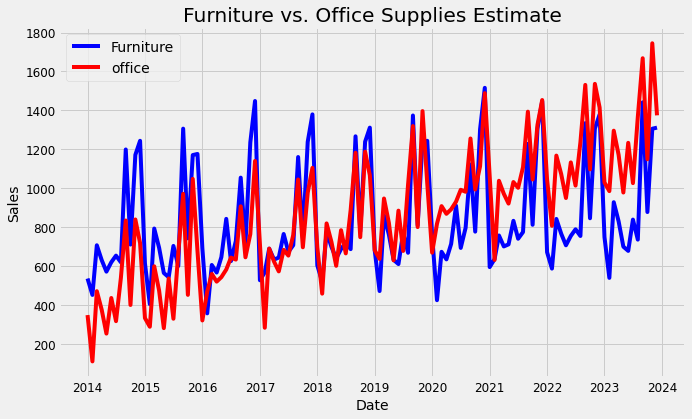

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-',label = 'Furniture' )
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-', label = 'office')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate')
plt.show()

# Relevant Future Trend 

In [ ]:
relevant_trend = forecast[(forecast['Date'] > '2022-05-01') & (forecast['Date'] < '2023-12-01')]

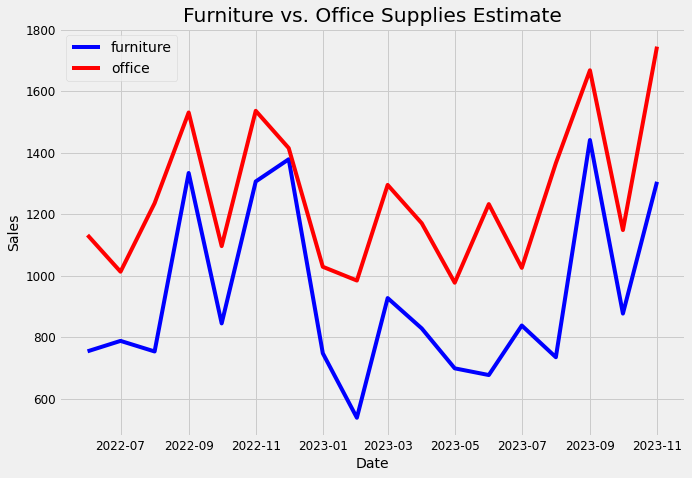

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(relevant_trend['Date'], relevant_trend['furniture_yhat'], 'b-', label='furniture')
plt.plot(relevant_trend['Date'], relevant_trend['office_yhat'], 'r-',label = 'office')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate')
plt.show()



Furniture Forecast:


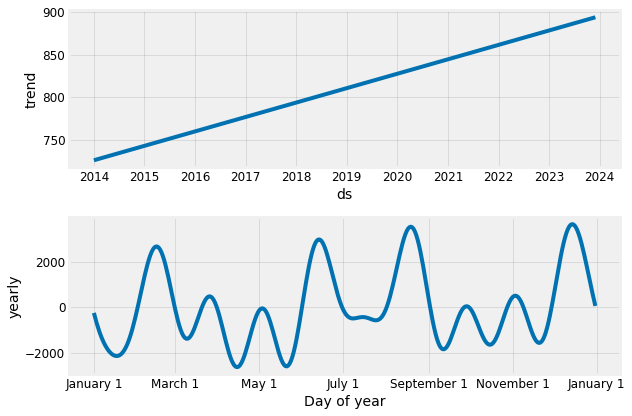

In [ ]:
print("\n\nFurniture Forecast:")
furniture_model.plot_components(furniture_forecast)
plt.show()



Office Forecast:


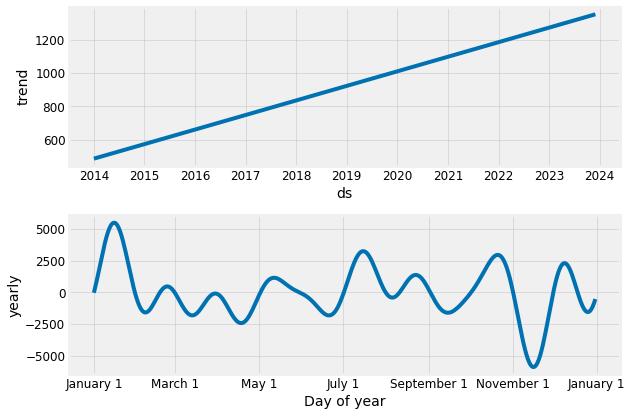

In [ ]:
print("\n\nOffice Forecast:")
office_model.plot_components(office_forecast)
plt.show()

In [ ]:
# df = pd.read_excel("superstore.xlsx")
# furniture = df.loc[df['Category'] == 'Furniture']

In [ ]:
# furniture = df.loc[df['Category'] == 'Furniture']


In [ ]:
# print(furniture['Order Date'].min(), furniture['Order Date'].max())


In [ ]:
# furniture = furniture.sort_values('Order Date')


In [ ]:
# furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()


In [ ]:
# furniture = furniture.set_index('Order Date')

In [ ]:
# y = furniture['Sales'].resample('MS').mean()


In [ ]:
office = office.set_index('ds')

In [ ]:
furniture = furniture.set_index('ds')


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 6.9 MB/s 
     |████████████████████████████████| 9.8 MB 41.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(office['y'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.664633
p-value: 0.000098


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(furniture['y'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.191070
p-value: 0.000009


In [ ]:
from pmdarima import auto_arima


In [ ]:
# arima_model = auto_arima(furniture, start_p=1, d=None, start_q=1, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=5, max_D=1, seasonal=True)

In [ ]:
# arima_model.summary()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing office supply to check seasonality

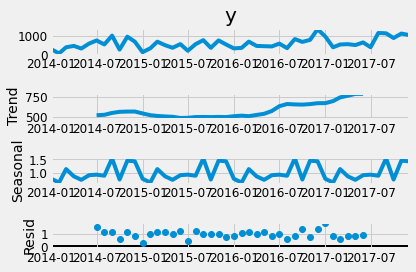

In [ ]:
result = seasonal_decompose(office['y'], model='mul')
result.plot();

# Decomposing Furniture to check seasonality

<Figure size 720x432 with 0 Axes>

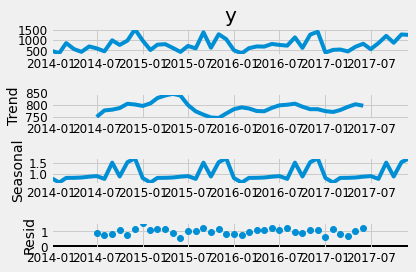

In [ ]:
plt.figure(figsize=(10,6))
result = seasonal_decompose(furniture['y'], model='mul')
result.plot();

# Performing Auto Arima to find the best Arima Parameters

In [ ]:
auto_arima(office['y'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -325.214
Date:                            Sat, 23 Apr 2022   AIC                            664.429
Time:                                    13:31:32   BIC                            677.380
Sample:                                         0   HQIC                           669.302
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1265      4.941      0.026      0.980      -9.557       9.810
ar.L1          0.1779      0.241      0.739      0.460      -0.294       0.650
ar.L2          0.0809      0.237      0.341      0.733      -0.384       0.546
ma.L1         -0.9819      0.343     -2.865      0.004      -1.654      -0.310
ar.S.L12       0.9802      0.774      1.266      0.206      -0.537       2.498
ma.S.L12      -0.8682      2.579     -0.337      0.736      -5.923       4.186
sigma2      5.941e+04   9.55e+04      0.622      0.534   -1.28e+05    2.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.27
Prob(Q):                              0.85   Prob(JB):                         0.32
Heteroskedasticity (H):               1.21   Skew:                             0.51
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(furniture['y'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -239.268
Date:                              Sat, 23 Apr 2022   AIC                            494.536
Time:                                      13:31:54   BIC                            507.204
Sample:                                           0   HQIC                           498.957
                                               - 48                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1936      1.681     -0.115      0.908      -3.488       3.100
ar.L1          1.7059      0.206      8.279      0.000       1.302       2.110
ar.L2         -0.8535      0.181     -4.715      0.000      -1.208      -0.499
ma.L1         -1.9396      1.980     -0.979      0.327      -5.821       1.942
ma.L2          0.9504      1.849      0.514      0.607      -2.674       4.575
ar.S.L12      -0.1212      0.564     -0.215      0.830      -1.226       0.984
ma.S.L12      -0.8576      3.162     -0.271      0.786      -7.055       5.340
sigma2       1.91e+04   7.04e+04      0.271      0.786   -1.19e+05    1.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.33   Prob(JB):                         0.80
Heteroskedasticity (H):               0.45   Skew:                             0.04
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_office_arima = office.iloc[:36]
test_office_arima = office.iloc[36:]

In [ ]:
train_furniture_arima = furniture.iloc[:36]
test_furniture_arima =  furniture.iloc[36:]

# Fitting SARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_office_arima = SARIMAX(train_office_arima['y'], order = (1,0,1),seasonal_order = (1, 0, 1, 12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
model_furniture_arima = SARIMAX(train_furniture_arima['y'], order = (2,0,2),seasonal_order = (1, 1, [1], 12)	)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
results_office = model_office_arima.fit()
results_furniture = model_furniture_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
start_office = len(train_office_arima)
end_office = len(train_office_arima) + len(test_office_arima) -1

In [ ]:
start_furniture = len(train_furniture_arima)
end_furniture = len(train_furniture_arima) + len(test_furniture_arima) -1

In [ ]:
prediction_office_arima = results_office.predict(start_office, end_office, typ='levels').rename('SARIMA prediction')

In [ ]:
prediction_furniture_arima = results_furniture.predict(start_furniture, end_furniture, typ='levels').rename('SARIMA prediction')

In [ ]:
from statsmodels.tools.eval_measures import rmse

# RMSE office using SARIMA Model

In [ ]:
 rmse(test_office_arima['y'],prediction_office_arima )

272.17139816595045

In [ ]:
test_office_arima.mean()

y    780.171647
dtype: float64

# RMSE furniture using SARIMA model

In [ ]:
 rmse(test_furniture_arima['y'],prediction_furniture_arima)

252.82952943795877

In [ ]:
test_furniture_arima['y'].mean()

788.9924321352877

In [ ]:
 fore_arima_office = results_office.predict(len(office),len(office)+ 71,typ='levels')

In [ ]:
fore_arima_furniture = results_furniture.predict(len(furniture), len(furniture)+ 71,typ='levels')

# Future forecase of office using SARIMA

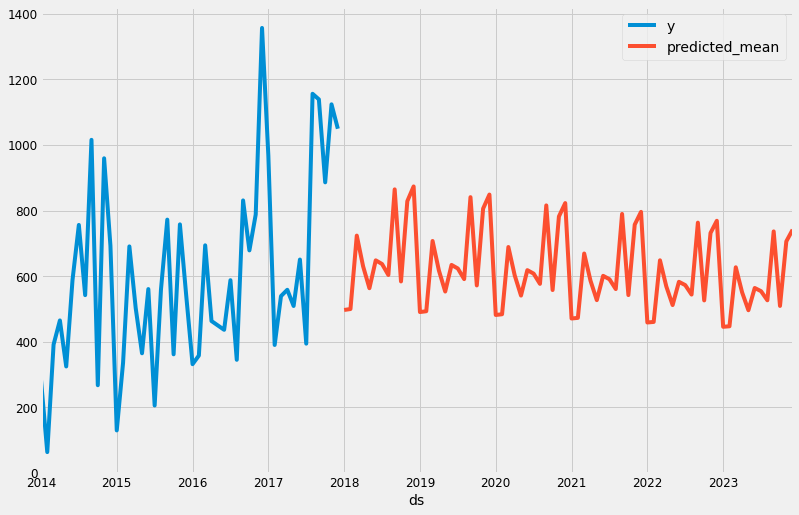

In [ ]:
office['y'].plot(legend=True, figsize=(12,8))
fore_arima_office.plot(legend =True)

# Fututre Forecast of furniture using SARIMA

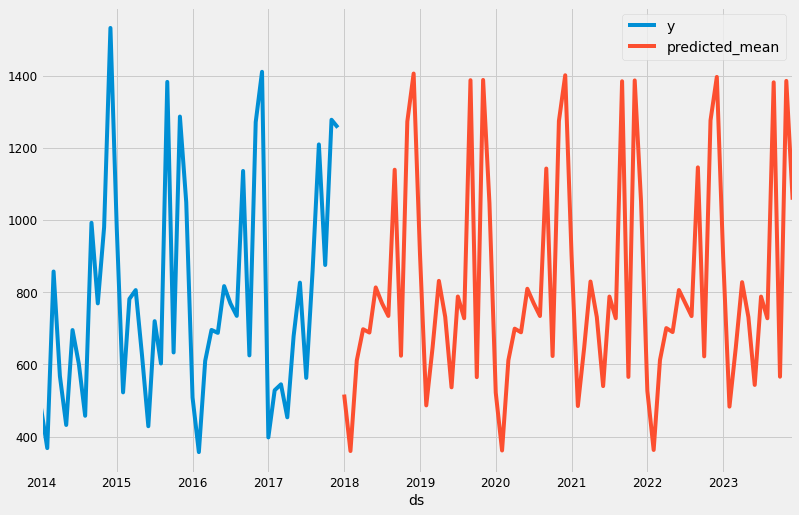

In [ ]:
plt.figure(figsize=(6,6))
furniture['y'].plot(legend=True, figsize=(12,8))
fore_arima_furniture.plot(legend =True)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'abbrev'],
      dtype='object')

In [ ]:
df.groupby(by='Customer Name').count().sort_values('Product ID', ascending=False).reset_index().rename(columns={"Row ID": "Quantity"})[['Customer Name','Quantity']]

,Customer Name,Quantity,Quantity
0,William Brown,37,37
1,Matt Abelman,34,34
2,John Lee,34,34
3,Paul Prost,34,34
4,Edward Hooks,32,32
...,...,...,...
788,Carl Jackson,1,1
789,Jocasta Rupert,1,1
790,Ricardo Emerson,1,1
791,Anthony O'Donnell,1,1


In [ ]:
df_cust = df[df['Customer ID'] =='WB-21850']

In [ ]:
df_cust[['Customer ID', 'Customer Name']].head(1)

,Customer ID,Customer Name
2133,WB-21850,William Brown


In [ ]:
df[['Product Name']].value_counts().rename_axis('Product Name').reset_index(name='Count')

,Product Name,Count
0,Staple envelope,48
1,Staples,46
2,Easy-staple paper,46
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,19
...,...,...
1845,Xerox 1922,1
1846,4009 Highlighters,1
1847,Belkin 8 Outlet SurgeMaster II Gold Surge Prot...,1
1848,"Brother MFC-9340CDW LED All-In-One Printer, Co...",1


In [ ]:
df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'abbrev'],
      dtype='object')

In [ ]:
print('AIC for the office model',results_office.aic)
print('BIC for the office model',results_office.bic)



AIC for the office model 510.4414663775045
BIC for the office model 518.3590610697851


In [ ]:
print('AIC for the furniture model',results_furniture.aic)
print('BIC for the furniture model',results_furniture.bic)


AIC for the furniture model 338.6431810449667
BIC for the furniture model 346.88955785740234


In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,abbrev
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,KY
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,KY
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,FL
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,FL
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,CA
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,CA
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,CA


In [ ]:

df_new = df.groupby(by=["abbrev"]).count()


In [ ]:
df_new.reset_index(inplace=True)

In [ ]:
fig = px.choropleth(df_new,
                    locations='abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Product ID',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.update_layout(
      title_text = 'Quantity of product being sold',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

In [ ]:
df['month'] = df['Order Date'].dt.month


In [ ]:
df_month = df.groupby(by=["month"]).sum()


In [ ]:
df_month.reset_index(inplace=True)

In [ ]:
x=df_month['month']
y=df_month['Sales']

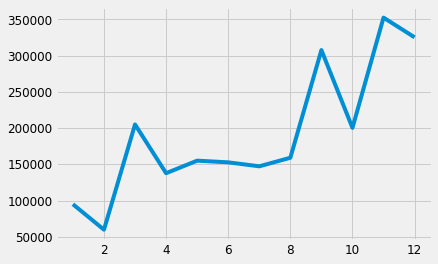

In [ ]:
plt.plot(x,y)


In [ ]:
# df_month